# The AR Model

In [10]:
%load_ext watermark
%watermark -a "Xu Han" -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn,MarkupSafe,pandas-profiling

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Xu Han

Last updated: 2022-05-25

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy           : 1.21.4
pandas          : 1.4.2
matplotlib      : 3.4.3
scipy           : 1.7.1
sklearn         : 0.0
MarkupSafe      : not installed
pandas-profiling: not installed



In [8]:
!pip install pandas-profiling
!pip install MarkupSafe==2.1.1
!pip install --user --upgrade aws-sam-cli

  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
aws-sam-cli 1.50.0 requires MarkupSafe==2.0.1, but you have markupsafe 2.1.1 which is incompatible.


  Using cached MarkupSafe-2.0.1-cp39-cp39-win_amd64.whl (14 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [1]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] Your Python version is 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
[OK] numpy 1.21.4
[OK] scipy 1.7.1
[OK] matplotlib 3.4.3
[OK] sklearn 1.0.2
[OK] pandas 1.4.2


## Listing 3-1. Describing a dataframe

In [40]:
import pandas as pd

# Import the dataframe
eq = pd.read_csv('Ch03_Earthquake_database.csv')

# Describe the dataframe
eq.describe()


,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


## Listing 3-2. Profiling a dataframe

## Listing 3-3. Convert the earthquake data to the yearly number of earthquake

In [35]:
eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [41]:
# Convert years to dates
eq['year'] = pd.to_datetime(eq['Date'],format="%m/%d/%Y").dt.year

In [42]:
import matplotlib.pyplot as plt
# Filter on earthquakes with magnitude of 7 or higher
eq = eq[eq['Magnitude'] >= 7]

In [43]:
# Compute a count of earthquakes per year
earthquakes_per_year = eq.groupby('year').count().iloc[:,0]

In [44]:
earthquakes_per_year.tail()

year
2012    16
2013    19
2014    12
2015    19
2016    16
Name: Date, dtype: int64

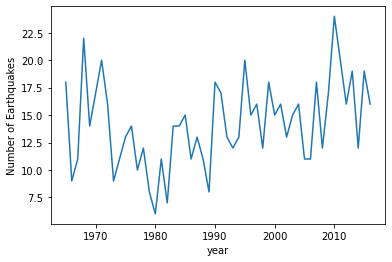

In [6]:
# Make a plot of earthquakes per year
ax =earthquakes_per_year.plot()
ax.set_ylabel("Number of Earthquakes")
plt.show()

## Listing 3-4. Convert the earthquake data to the yearly number of earthquake

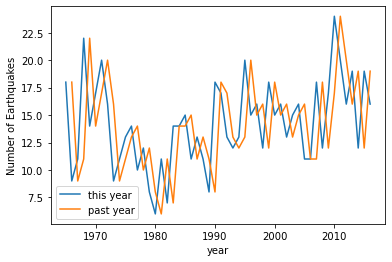

In [7]:
shifts = pd.DataFrame(
    {
        'this year': earthquakes_per_year,
        'past year': earthquakes_per_year.shift(1)
    }
)

ax = shifts.plot()
ax.set_ylabel('Number of Earthquakes')
plt.show()


## Listing 3-5. Drop missing data

In [8]:
shifts = shifts.dropna()

## Listing 3-6. Compute a correlation matrix for the shifts dataframe

In [9]:
shifts.corr()

,this year,past year
this year,1.000000,0.266657
past year,0.266657,1.000000


## Listing 3-7. Augmented Dicky Fuller test

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(earthquakes_per_year.dropna())
print(result)

pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')


(-5.380533478877688, 3.7211181090570817e-06, 0, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 219.69402897705197)
stationary


## Listing 3-8. Differencing in pandas

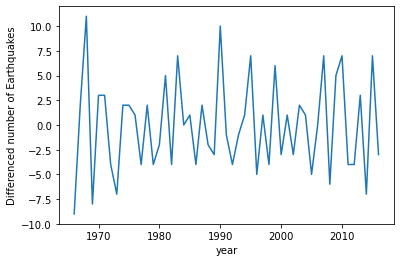

In [11]:
# Difference the data
differenced_data = earthquakes_per_year.diff().dropna()

# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced number of Earthquakes')
plt.show()


## Listing 3-9. Autocorrelation of the differenced data

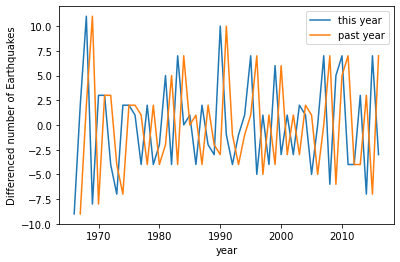

,this year,past year
this year,1.00000,-0.41607
past year,-0.41607,1.00000


In [12]:
shifts_diff = pd.DataFrame(
    {
        'this year': differenced_data,
        'past year': differenced_data.shift(1)
    }
)

ax = shifts_diff.plot()
ax.set_ylabel('Differenced number of Earthquakes')
plt.show()

shifts_diff.corr()


## Listing 3-10. Autocorrelation of the differenced data

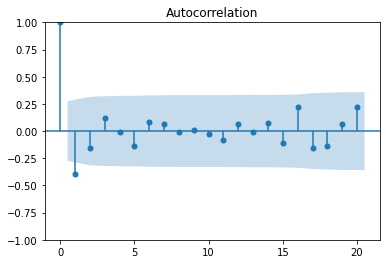

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(differenced_data, lags=20)
plt.show()


## Listing 3-11.Partial Autocorrelation of the differenced data

C:\Users\hansh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


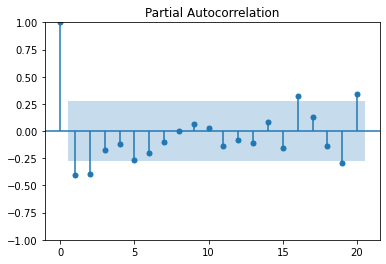

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced_data, lags = 20)
plt.show()


## Listing 3-12. Estimate Yule Walker AR coefficients with order 3

In [15]:
from statsmodels.regression.linear_model import yule_walker
coefficients, sigma = yule_walker(differenced_data, order = 3)
print('coefficients: ', coefficients)
print('sigma: ', sigma)


coefficients:  [-0.63390427 -0.48970585 -0.17569908]
sigma:  3.8940613973301224


In [80]:
earthquakes_per_year.head()

year
1965    18
1966     9
1967    11
1968    22
1969    14
Name: Date, dtype: int64

In [79]:
differenced_data.head()

year
1966    -9.0
1967     2.0
1968    11.0
1969    -8.0
1970     3.0
Name: Date, dtype: float64

## Listing 3-13. Make a Forecast with the AR coefficients

In [83]:
coefficients, sigma = yule_walker(differenced_data, order = 3)

# Make a list of differenced values
val_list = list(differenced_data)
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 10

# For each year to predict
for i in range(n_steps):
    
    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):
        
        new_val += coefficients[j] * val_list[j]
    
    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

# Redo the reverse to have the order of time
val_list.reverse()

In [84]:
val_list

[-9.0,
 2.0,
 11.0,
 -8.0,
 3.0,
 3.0,
 -4.0,
 -7.0,
 2.0,
 2.0,
 1.0,
 -4.0,
 2.0,
 -4.0,
 -2.0,
 5.0,
 -4.0,
 7.0,
 0.0,
 1.0,
 -4.0,
 2.0,
 -2.0,
 -3.0,
 10.0,
 -1.0,
 -4.0,
 -1.0,
 1.0,
 7.0,
 -5.0,
 1.0,
 -4.0,
 6.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 1.0,
 -5.0,
 0.0,
 7.0,
 -6.0,
 5.0,
 7.0,
 -4.0,
 -4.0,
 3.0,
 -7.0,
 7.0,
 -3.0,
 -0.29633457879790615,
 0.427071726024423,
 0.40149143652700875,
 -0.4115809433403693,
 -0.010745900435592273,
 0.13782379095074243,
 -0.009790364417121361,
 -0.05939891817219137,
 0.018232112672403454,
 0.019250741807983297]

In [85]:
# Add the original first value back into the list and do a cumulative sum to undo the differencing 
import numpy as np
val_list = [earthquakes_per_year.values[0]] + val_list
val_list

[18,
 -9.0,
 2.0,
 11.0,
 -8.0,
 3.0,
 3.0,
 -4.0,
 -7.0,
 2.0,
 2.0,
 1.0,
 -4.0,
 2.0,
 -4.0,
 -2.0,
 5.0,
 -4.0,
 7.0,
 0.0,
 1.0,
 -4.0,
 2.0,
 -2.0,
 -3.0,
 10.0,
 -1.0,
 -4.0,
 -1.0,
 1.0,
 7.0,
 -5.0,
 1.0,
 -4.0,
 6.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 1.0,
 -5.0,
 0.0,
 7.0,
 -6.0,
 5.0,
 7.0,
 -4.0,
 -4.0,
 3.0,
 -7.0,
 7.0,
 -3.0,
 -0.29633457879790615,
 0.427071726024423,
 0.40149143652700875,
 -0.4115809433403693,
 -0.010745900435592273,
 0.13782379095074243,
 -0.009790364417121361,
 -0.05939891817219137,
 0.018232112672403454,
 0.019250741807983297]

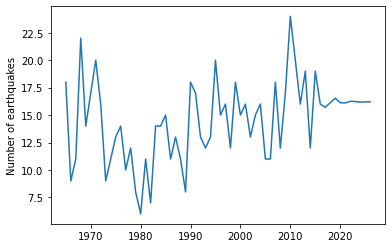

In [86]:
# Add the original first value back into the list and do a cumulative sum to undo the differencing 
new_val_list = pd.Series(val_list).cumsum()

# Plot the newly obtained list
plt.plot(range(1965, 2027), new_val_list)
plt.ylabel('Number of earthquakes')
plt.show()


## Listing 3-14. Fit the model on a train set and evaluate it on a test set

In [102]:
from sklearn.metrics import r2_score

train = list(differenced_data)[:-12]
test = list(earthquakes_per_year)[-12:]

coefficients, sigma = yule_walker(train, order = 3)


In [103]:
coefficients

array([-0.6212063 , -0.51548298, -0.28172753])

In [104]:
# Make a list of differenced values
val_list = list(train)
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()
# Define the number of years to predict
n_steps = 12

# For each year to predict
for i in range(n_steps):
    
    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient
    new_val = 0
    for j in range(len(coefficients)):
        
        new_val += coefficients[j] * val_list[j]
    
    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)


In [105]:
# Redo the reverso to have the order of time
val_list.reverse()

In [106]:
val_list = [earthquakes_per_year.values[0]] + val_list
val_list

[18,
 -9.0,
 2.0,
 11.0,
 -8.0,
 3.0,
 3.0,
 -4.0,
 -7.0,
 2.0,
 2.0,
 1.0,
 -4.0,
 2.0,
 -4.0,
 -2.0,
 5.0,
 -4.0,
 7.0,
 0.0,
 1.0,
 -4.0,
 2.0,
 -2.0,
 -3.0,
 10.0,
 -1.0,
 -4.0,
 -1.0,
 1.0,
 7.0,
 -5.0,
 1.0,
 -4.0,
 6.0,
 -3.0,
 1.0,
 -3.0,
 2.0,
 1.0,
 -0.806989659377384,
 -0.5776309810882279,
 0.49308990592885094,
 0.21879958659990567,
 -0.22736458400129622,
 -0.11046415255396415,
 0.12418173287120546,
 0.04385477847138181,
 -0.06013564106268189,
 -0.02023516578561056,
 0.031214013305094643,
 0.007982407512654425]

In [107]:
new_val_list = pd.Series(val_list).cumsum()

In [108]:
# Plot the newly obtained list
validation = pd.DataFrame({
    'original': earthquakes_per_year.values,
    'pred': new_val_list })

print('Test R2:', r2_score(validation.iloc[-12:, 0], validation.iloc[-12:, 1]))


Test R2: -0.08600535027515854


In [109]:
validation.index=earthquakes_per_year.index

In [110]:
validation

,original,pred
year,,
1965,18,18.000000
1966,9,9.000000
1967,11,11.000000
1968,22,22.000000
1969,14,14.000000
1970,17,17.000000
1971,20,20.000000
1972,16,16.000000
1973,9,9.000000


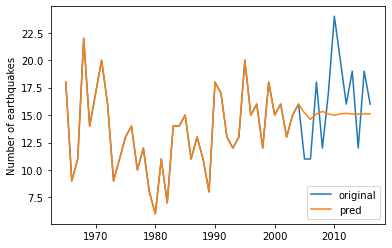

In [111]:
# Plot the newly obtained list
plt.plot(validation)
plt.legend(validation.columns,loc="lower right")
plt.ylabel('Number of earthquakes')
plt.show()

## Listing 3-15. Apply a grid search to find the order that gives the best R2 score on the test data

In [112]:
def evaluate(order):
    train = list(differenced_data)[:-12]
    test = list(earthquakes_per_year)[-12:]

    coefficients, sigma = yule_walker(train, order = order)

    # Make a list of differenced values
    val_list = list(train)
    # Reverse the list to corresponds with the order of coefs
    val_list.reverse()
    # Define the number of years to predict
    n_steps = 12

    # For each year to predict
    for i in range(n_steps):

        # Compute the new value 
        new_val = 0
        for j in range(len(coefficients)):
            new_val += coefficients[j] * val_list[j]

        # Insert the new value at the beginning of the list
        val_list.insert(0, new_val)

    # Redo the reverse to have the order of time
    val_list.reverse()

    # Undo the differencing with a cumsum
    val_list = [earthquakes_per_year.values[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()

    # Plot the newly obtained list
    validation = pd.DataFrame({
        'original': earthquakes_per_year.values,
        'pred': new_val_list })

    return r2_score(validation.iloc[-12:, 0], validation.iloc[-12:, 1])



In [113]:
# For each order between 1 and 30, fit and evaluate the model
orders = []
r2scores = []
for order in range(1, 31):
    orders.append(order)
    r2scores.append(evaluate(order))
    
# Create a results data frame
results =pd.DataFrame({'orders': orders,
                      'scores': r2scores})

# Show the order with best R2 score
results[results['scores'] == results.max()['scores']]


,orders,scores
16,17,0.124929


In [114]:
results

,orders,scores
0,1,-1.521066e-02
1,2,-4.701752e-02
2,3,-8.600535e-02
3,4,-9.717596e-02
4,5,-5.089662e-02
5,6,-8.583537e-02
6,7,-8.495494e-02
7,8,-9.145631e-02
8,9,-1.252150e-01
9,10,-1.744705e-01
